In [2]:
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')

In [1]:
from bbtnn import bbtnn

In [3]:
adata=sc.read("/Users/lsimon/OneDrive/Miko/UTHealth/projects/BatchBalancedTriplets/data/MouseAtlas/MouseAtlas.subset.h5ad")

In [4]:
subset=adata[adata.obs["Dataset"].isin(["MCA", "Tabula(Droplet)"])]

In [5]:
sc.pp.pca(subset)
sc.pp.neighbors(subset)
sc.tl.umap(subset)

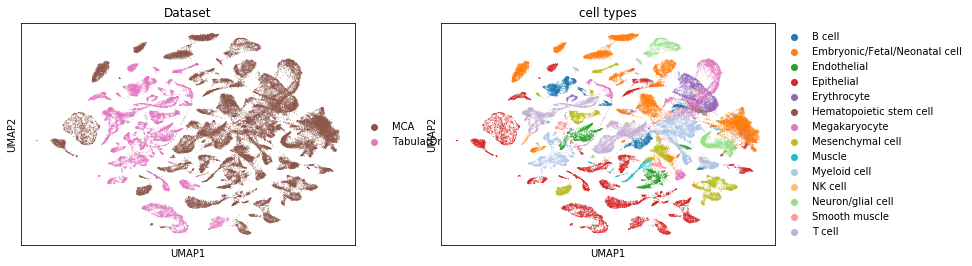

In [19]:
sc.pl.umap(subset, color = ["Dataset", "cell types"])

In [21]:
def bbtnn(X, batch, k = 10, n_pcs=50, approx = True, metric="euclidean", use_faiss=True, n_trees=10, model='maaten', verbose=1,
          distance='pn',batch_size=32, epochs=100, n_epochs_without_progress=3):
    knn_distances, knn_indices=bbknn.get_graph(pca=X, batch_list = batch, neighbors_within_batch=k, n_pcs=n_pcs, approx=approx, metric=metric, use_faiss=use_faiss, n_trees=n_trees)
    neighbour_matrix=knn_indices
    ivis_model = Ivis(model=model, verbose = verbose, distance=distance, batch_size=batch_size, epochs=epochs, n_epochs_without_progress=n_epochs_without_progress)
    embeddings = ivis_model.fit_transform(X, batch)
    return embeddings

In [23]:
def get_indices(X, batch, k = 10, n_pcs=50, approx = True, metric="euclidean", use_faiss=True, n_trees=10):
    knn_distances, knn_indices=bbknn.get_graph(pca=X, batch_list = batch, neighbors_within_batch=k, n_pcs=n_pcs, approx=approx, metric=metric, use_faiss=use_faiss, n_trees=n_trees)
    neighbour_matrix=knn_indices
    return neighbour_matrix

In [24]:
neigh_matr = get_indices(X = adata.obsm["X_pca"], batch = adata.obs["Dataset"])

In [26]:
def bbtnn(X, batch, k = 10, n_pcs=50, approx = True, metric="euclidean", use_faiss=True, n_trees=10, model='maaten', verbose=1,
          distance='pn',batch_size=32, epochs=100, n_epochs_without_progress=3):
    print("in")
    ivis_model = Ivis(model=model, verbose = verbose, distance=distance, batch_size=batch_size, epochs=epochs, n_epochs_without_progress=n_epochs_without_progress)
    print("finished training")
    embeddings = ivis_model.fit_transform(X, batch)
    return embeddings

In [25]:
def generator_from_index(X, batch, k = 10, n_pcs=50, approx = True, metric="euclidean", use_faiss=True, n_trees=10):
        if k >= X.shape[0] - 1:
                raise Exception('''k value greater than or equal to (num_rows - 1)(k={}, rows={}). Lower k to a smaller value.'''.format(k, X.shape[0]))

        if batch_size > X.shape[0]:
                raise Exception('''batch_size value larger than num_rows in dataset (batch_size={}, rows={}). Lower batch_size to a smaller value.'''.format(batch_size, X.shape[0]))

        knn_distances, knn_indices=bbknn.get_graph(pca=X, batch_list = batch, neighbors_within_batch=k, n_pcs=50, approx=True, metric="euclidean", use_faiss=True, n_trees=10)

        neighbour_matrix = knn_indices
        return KnnTripletGenerator(X = X, batch = batch, neighbour_matrix = neighbour_matrix, batch_size=batch_size)


In [27]:
tmp = bbtnn(X = adata.obsm["X_pca"], batch = adata.obs["Dataset"])

Training neural network


NameError: name 'multiprocessing' is not defined

In [17]:
from bbtnn.bbtnn import Ivis

In [20]:
import multiprocessing

In [ ]:
multiprocessing.cpu_count()